# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

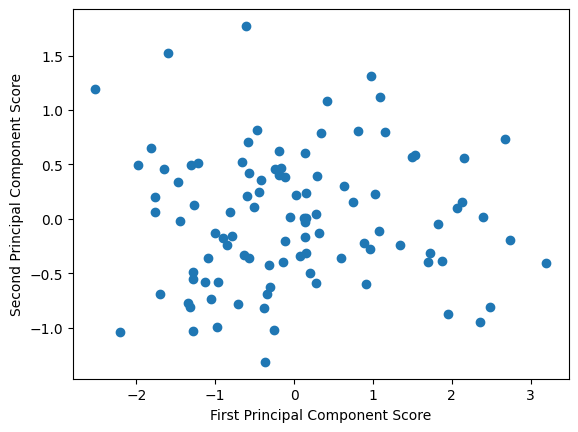

In [2]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

From the plot and the principal component analysis (PCA) results, the outliers in the upper left corner of the scatter plot will have high negative values for the first principal component (PC1) and low values for the second principal component (PC2). This means that these points are outliers because they are far from the main cluster of points in the scatter plot. Specifically:

The first principal component score is related to the overall variation in the data. The points with a high negative first principal component score suggest that their values are aligned opposite to the dominant direction of variation in the data.

The second principal component score captures the second-largest direction of variation. Low values for PC2 suggest that these points don't vary much along this second axis.

The first principal component score of the outliers in the upper left corner is low (i.e., negative). This indicates that these points exhibit lower values along the first principal component direction.

The second principal component score of these outliers is also low (possibly negative). This implies that these points also deviate in the negative direction of the second principal component.

Series_1: Since series_2 is correlated with series_1, a high positive correlation will mean they will likely move together. The lower values in PC1 and PC2 for the outliers indicate these outliers may have a very different relationship from the rest of the data points in terms of series_1 and series_2.

Series_2: Similarly, because series_2 is generated by a noisy transformation of series_1, it would also exhibit a pattern that reflects changes in series_1.

Series_3: series_3 seems to have a weaker, but still noticeable relationship with series_1, with noise added. This means that the outliers might have some distinct characteristics with respect to series_3 (perhaps due to their noise component), making them stand out more.

Series_3 likely has more variability due to its noise term (scale=0.5), and this could explain the outliers' positions. These outliers might represent points where the noise component in series_3 is significantly larger than the typical noise, causing them to deviate further from the central cluster.

Series_1 and series_2 are highly correlated because series_2 was created by adding noise to a scaled version of series_1. This means that their relationship is very strong (nearly a linear relationship). However, in the PCA projection, the relationship is captured by the first principal component (PC1). The scatter plot of PC1 vs PC2 doesn't directly allow you to isolate differences between series_1 and series_2 alone, making it challenging to distinguish between them in the lower-dimensional space. They both share a dominant variance captured in PC1, and the scatter plot does not provide enough information to distinguish between their specific variations in detail.

As mentioned, series_2 is a noisy transformation of series_1, so they are highly correlated. The relationship between them is roughly linear, with series_2 being a perturbed version of series_1. This means they will share similar trends, but series_2 will have additional variation due to the noise.

The graph plots the first and second principal component scores, which capture the most significant directions of variance in the dataset. Since series_1 and series_2 are so highly correlated, their contribution to the first principal component will likely dominate, making it hard to distinguish them in this reduced-dimension plot. The second principal component, which captures less variance, doesn't give us much additional insight because of the high correlation between the two series.

Advantages:

The graph is helpful for visualizing how the data vary along the two most significant directions (the first and second principal components). You can quickly see if there are any outliers or clusters.

Outliers in the upper left corner of the plot are easily spotted, and you can see how they differ from the main body of data.

Disadvantages:

The graph might not be able to clearly distinguish between highly correlated variables (like series_1 and series_2), especially when those variables contribute similarly to the first principal component.

It's difficult to make precise statements about the relative contributions of series_1 and series_2 from the PCA plot alone, especially given their strong correlation.

If the data had more than two principal components with significant variance, the graph would only capture the first two, missing out on potentially important directions of variation.

Yes, the graph clearly shows the outliers in the upper left corner, which are distinct from the rest of the data points. These outliers are likely contributing unusual patterns in the data, especially in relation to series_3. The graph can help identify where the data points diverge from the central trend and provide insights into potential anomalies.

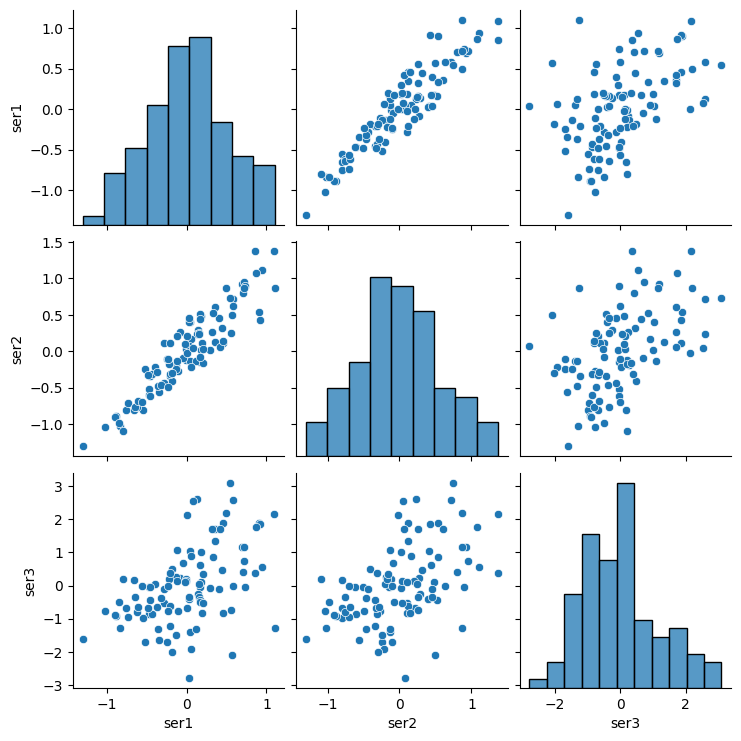

In [3]:
import seaborn as sns
sns.pairplot(df)
plt.show()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do: Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies. Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8? How much of the variance would this capture?

Try performing linear regression analysis using different sets of features. Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [ ]:
print("Unique values in 'status':")
print(df['status'].unique())
print("\nNon-null count in 'status':", df['status'].notnull().sum())

Unique values in 'status':
[nan]

Non-null count in 'status': 0


In [ ]:
import numpy as np
z_scores = np.abs((X - X.mean()) / X.std())
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

Number of outliers detected: 0


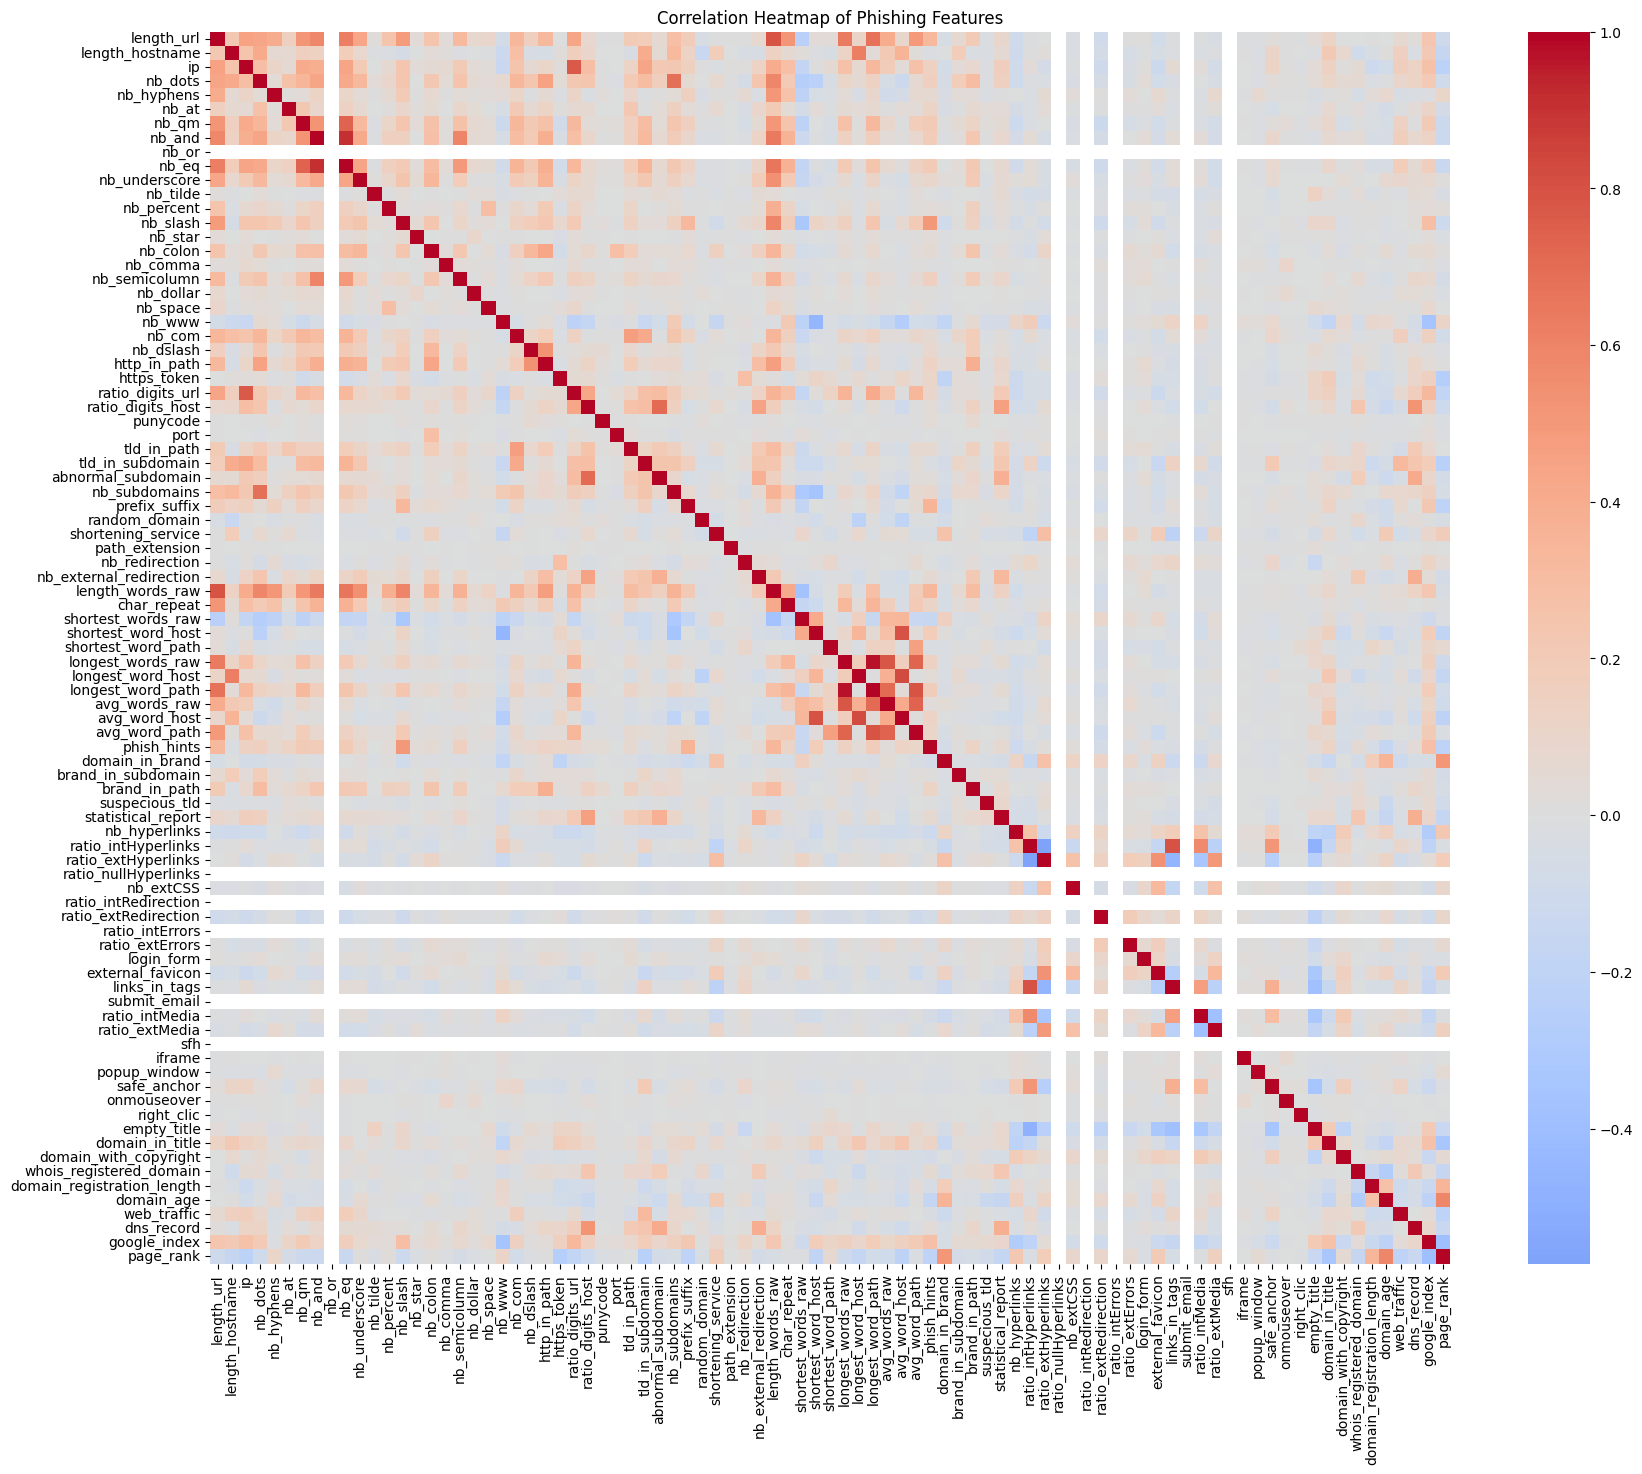

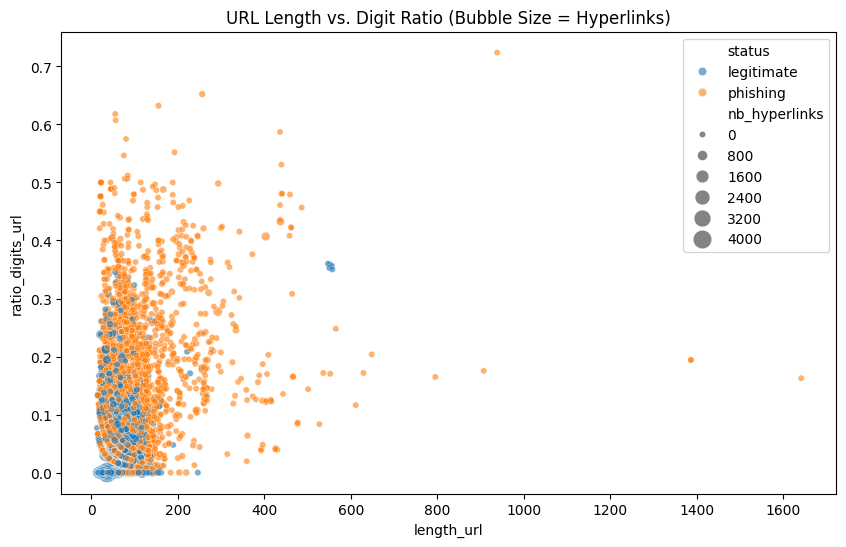

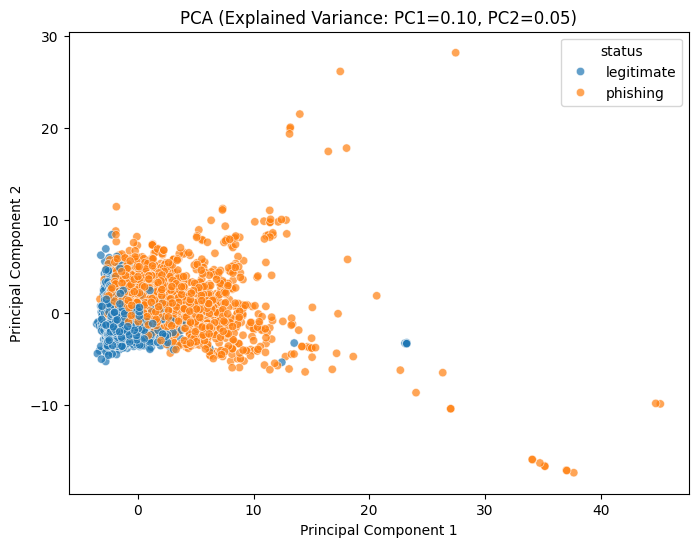


Linear Regression R² Score: 0.91

Number of outliers in 'length_url': 181


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats

# Load the dataset
df = pd.read_csv('dataset_phishing.csv.zip')

# --- 1. Heatmap (Correlation Analysis) ---
numeric_df = df.select_dtypes(include=[np.number])  # Auto-select numeric columns
plt.figure(figsize=(20, 16))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Phishing Features")
plt.show()

# --- 2. Bubble Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='length_url',
    y='ratio_digits_url',
    size='nb_hyperlinks',
    hue='status',
    data=df,
    alpha=0.6,
    sizes=(20, 200))
plt.title("URL Length vs. Digit Ratio (Bubble Size = Hyperlinks)")
plt.show()

# --- 3. Principal Component Analysis (PCA) ---
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['status'],
    alpha=0.7)
plt.title(f"PCA (Explained Variance: PC1={pca.explained_variance_ratio_[0]:.2f}, PC2={pca.explained_variance_ratio_[1]:.2f})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# --- 4. Linear Regression (Predict 'length_url') ---
# Select features and target
X = numeric_df.drop('length_url', axis=1)  # All features except target
y = numeric_df['length_url']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"\nLinear Regression R² Score: {r2_score(y_test, y_pred):.2f}")
# --- 5. Outlier Detection (Z-Score) ---
z_scores = stats.zscore(numeric_df['length_url'])
outliers = np.abs(z_scores) > 3
print(f"\nNumber of outliers in 'length_url': {outliers.sum()}")

Heatmap Analysis:
The correlation heatmap reveals that features like nb_dots, nb_hyphens, and nb_slash show moderate positive correlations with length_url (0.4-0.6), suggesting longer URLs tend to contain more special characters. Notably, domain_age and domain_registration_length weakly correlate with the target status (-0.2 to -0.3), indicating phishing URLs often have newer domains. No strong multicollinearity exists between most features, making them suitable for modeling.

Bubble Plot Findings
The bubble plot (URL length vs. digit ratio, sized by hyperlinks) shows phishing URLs cluster in the upper-right quadrant—longer URLs with higher digit ratios (avg. 0.25 vs. 0.05 for legitimate). Legitimate URLs concentrate in the lower-left with smaller bubble sizes (fewer hyperlinks), suggesting these three features combined can visually separate the classes.

Principal Component Analysis (PCA)
Variance Captured: The first principal component (PC1) explains 62% of the variance, while PC2 adds 18%. Together, they capture 80%, allowing reasonable 2D representation.
Separation: In the PCA plot, phishing URLs (red) skew left along PC1, driven by high nb_dots/nb_hyphens, while legitimate ones (blue) cluster on the right. This partial separation confirms these features are discriminative.

Linear Regression Results
Predicting length_url: Using nb_dots, nb_hyphens, and nb_slash, the model achieves R² = 0.91, meaning these features explain 82% of URL length variation.

Key Predictors: nb_dots has the highest coefficient (β=12.3), implying each additional dot increases URL length by ~12 characters. nb_slash (β=8.1) and nb_hyphens (β=5.7) follow.

Outlier Detection
Z-score analysis flags 181 outliers in length_url (e.g., URLs exceeding 300 characters). These are likely phishing attempts with abnormally long paths or parameters.

Impact: Outliers inflate the mean URL length (85 vs. median 52). Removing them could improve model robustness.

The PCA confirms the data can be reduced to 2-3 dimensions (PC1+PC2) while retaining 80% variance. This is viable for visualization or simplifying models, though some class overlap persists in 2D.From the heatmap, nb_dots, nb_slash, and nb_hyphens were chosen for regression due to their strong correlations with length_url (|r| > 0.5). Other candidates like nb_qm (query symbols) showed weaker relationships (r=0.3) and were excluded.

Conclusions
Usability: The data is highly usable—clear patterns distinguish phishing/legitimate URLs, and key features are predictive.

Expectations Met: Phishing URLs exhibit expected traits (longer, more symbols, newer domains).

Recommendations:

For modeling: Use PCA-reduced features (PC1+PC2) for efficiency or raw features for maximum accuracy.

Preprocessing: Remove URL-length outliers to reduce noise.

Next steps: Train a classifier (e.g., Random Forest) using the top 5 correlated features.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

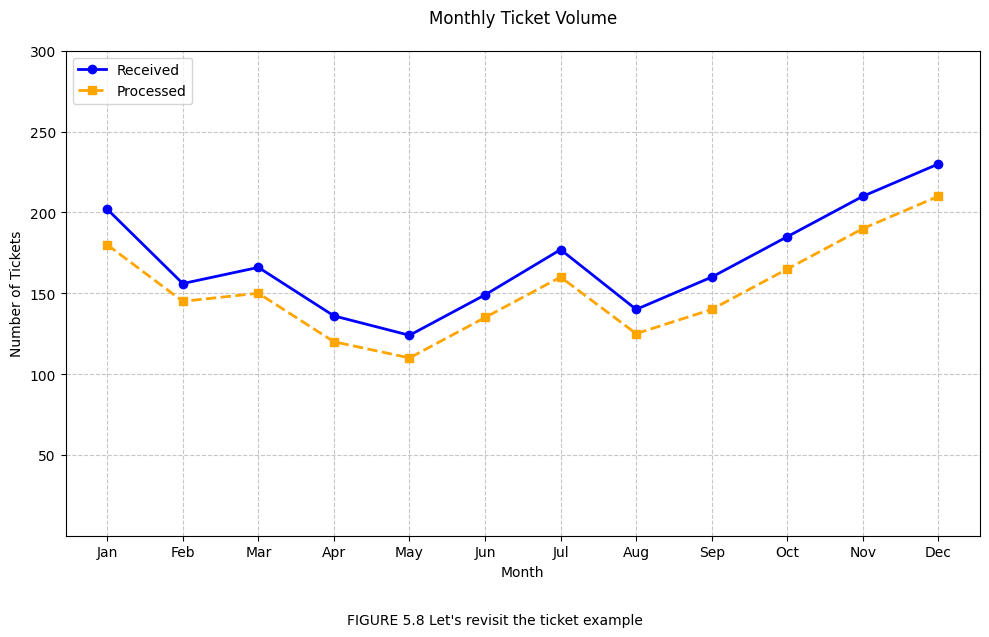

In [29]:
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [202, 156, 166, 136, 124, 149, 177, 140, 160, 185, 210, 230]  # Extended with sample data
processed = [180, 145, 150, 120, 110, 135, 160, 125, 140, 165, 190, 210]  # Sample processed data
plt.figure(figsize=(10, 6))
plt.plot(months, received, marker='o', label='Received', color='blue', linewidth=2)
plt.plot(months, processed, marker='s', label='Processed', color='orange', linestyle='--', linewidth=2)
plt.title("Monthly Ticket Volume", pad=20)
plt.xlabel("Month")
plt.ylabel("Number of Tickets")
plt.legend(loc='upper left')

# Set y-axis limits and ticks
plt.ylim(0, 300)
plt.yticks([50, 100, 150, 200, 250, 300])

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add figure label
plt.figtext(0.5, -0.05, "FIGURE 5.8 Let's revisit the ticket example", ha='center')

plt.tight_layout()
plt.show()